In [27]:

FILE_PATH = r"EE\6_Daten\Quartiere\Projekt-Varianten-Verzeichnis.xlsx"
SHEET = "Sample points"

import utils.nextcloud
import pandas as pd

file = utils.nextcloud.get(FILE_PATH)

df_raw = pd.read_excel(file,
                   sheet_name=SHEET,
                   header=0)

C:\Users\lektor\AppData\Local\Temp/ipykernel_11796/1826634671.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PV Ertrag [kWh/m²NGFa]"] = df_raw["PV Ertrag [kWh/a]"] / df_raw["NGF [m²]"]


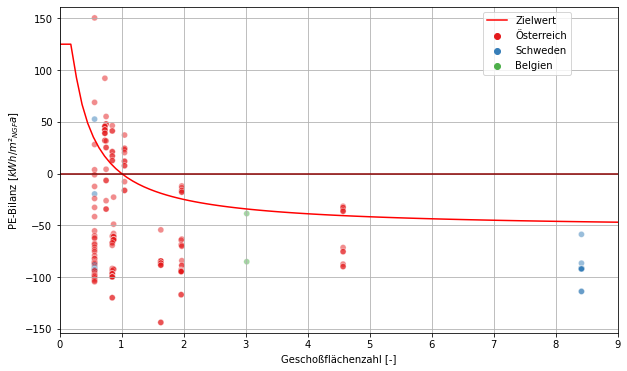

In [48]:
import matplotlib.pyplot as plt
from utils.targets import Zielwert
from utils.plotting import target_of_gfz
import numpy as np
import seaborn as sns

cols = [
    "Forschungsprojekt",
    "Quartier",
    "Variante",
    "Land",
    "GFZ",
    "PV Strategie",
    "PEB [kWh/m²NGFa]",
    "PEB [kWh/m²BGFa]",
    "PV Ertrag [kWh/m²BGFa]" ]
#plot as per quality
df = df_raw[cols]
df["PV Ertrag [kWh/m²NGFa]"] = df_raw["PV Ertrag [kWh/a]"] / df_raw["NGF [m²]"]


df = df
Y_VAR = "PEB [kWh/m²NGFa]"
GFZ_MAX = np.ceil(df.GFZ.max())
ymin, ymax = df[Y_VAR].min()-10, df[Y_VAR].max()+10


zq_zielwert = Zielwert.ZQSynergy()
GFZ = np.linspace(0,GFZ_MAX,100)
zw_df = pd.DataFrame()
zw_df["Zielwert"] = zq_zielwert.df(GFZ)
zw_df[""] = np.zeros(len(GFZ))

fig, ax = plt.subplots(1,1, figsize=(10,6))
target_of_gfz(ax, df=zw_df, xlims=(0,GFZ_MAX), color=["red", "darkred"])

sns.set_palette("Set1")
sns.scatterplot(ax=ax,
                x="GFZ",
                y=Y_VAR,
                hue="Land",
                data=df,
                alpha=0.5)


ax.set_ylim(ymin, ymax)
ax.set_xlim(0,GFZ_MAX)
ax.set_ylabel("PE-Bilanz $[{kWh/m²_{NGF}a}]$")
ax.legend(title='', bbox_to_anchor=(0.75, 1), loc='upper left')

plt.savefig("Land", bbox_inches="tight", dpi=200)

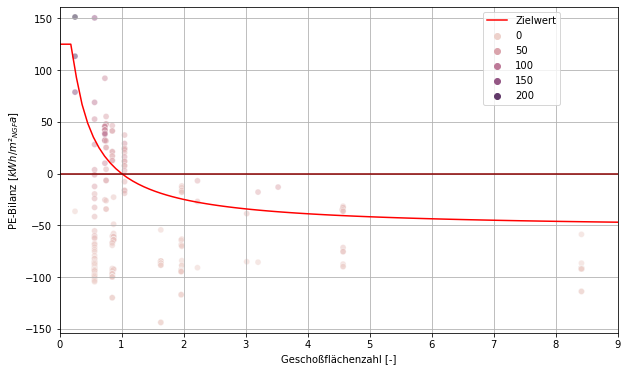

In [50]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
target_of_gfz(ax, df=zw_df, xlims=(0,GFZ_MAX), color=["red", "darkred"])

sns.set_palette("Oranges")
sns.scatterplot(ax=ax,
                x="GFZ",
                y="PEB [kWh/m²NGFa]",
                hue="PV Ertrag [kWh/m²BGFa]",
                #size="PV Ertrag [kWh/m²BGFa]",
                alpha=0.5,
                data=df)
ax.set_ylim(ymin, ymax)
ax.set_xlim(0,GFZ_MAX)
ax.set_ylabel("PE-Bilanz $[{kWh/m²_{NGF}a}]$")
ax.legend(title='', bbox_to_anchor=(0.75, 1), loc='upper left')
plt.savefig("PV_strategie", bbox_inches="tight", dpi=200)
